# Project: <a href="https://twitter.com/dog_rates">@WeRateDogs</a> Twitter Data Analysis

## Table of contents
- [Introduction](#intro)
- [Exploratory Data Analysis](#eda)
<ul>
    <li>What is the highest source used to tweet?</li>
    <li>Does the first algorithm need to be optimized?</li>
    <li>Is there a correlation between favorate and retweet?</li>
    <li>What is the most common rating?</li>
    <li>What is the most favorate dog stage?</li>
</ul>
- [Conclusion](#conc)

<a id='intro'></a>
## Introduction

In this project I will be visualizing data associated with <a href="https://twitter.com/dog_rates">@WeRateDogs</a> Twitter account to create interesting and trustworthy visualizations. <a href="https://twitter.com/dog_rates">@WeRateDogs</a> is basically a Twitter account that shares dogs' pictures along with a description. 

In particular, I will be interested in what is the highest source used to tweet? Does the first algorithm need to be optimized? Is there a correlation between favorate and retweet? What is the most common rating? and what is the most favorate dog stage?

In [286]:
# import all the required libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# fetch the dataset
df = pd.read_csv('twitter_archive_master.csv')

df = df[df.rating_numerator < 21]
df = df[df.rating_numerator > 1]

df.describe()

,tweet_id,rating_numerator,rating_denominator,confidence_of_first_prediction,retweet_count,favorite_count
count,2.033000e+03,2033.000000,2033.0,2033.000000,2033.000000,2033.000000
mean,7.380779e+17,10.610428,10.0,0.593649,2546.147073,7901.463847
std,6.773786e+16,2.115217,0.0,0.271170,4455.387024,11957.537604
min,6.660209e+17,2.000000,10.0,0.044333,11.000000,0.000000
25%,6.762636e+17,10.000000,10.0,0.362835,543.000000,1485.000000
50%,7.116527e+17,11.000000,10.0,0.587764,1197.000000,3476.000000
75%,7.931506e+17,12.000000,10.0,0.841987,2932.000000,9844.000000
max,8.924206e+17,15.000000,10.0,1.000000,76284.000000,153961.000000


The above table shows that the average rating that WeRateDog gave is 10.6. In addition, their followers seem they like their posts since the average number of likes is 7901. Moreover, all their tweets has been retweeted by their followers since the minimum retweet they have is 11 retweets.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='#q1'></a>
### Research Question 1
#### What is the highest source used to tweet?

<AxesSubplot:xlabel='source', ylabel='count'>

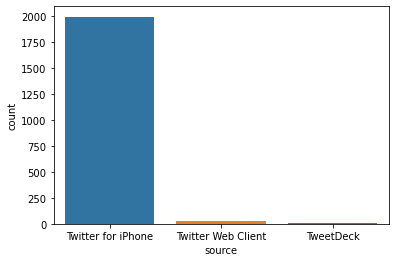

In [287]:
sns.countplot(x='source', data=df)

In [288]:
df.source.value_counts()

Twitter for iPhone    1995
Twitter Web Client      29
TweetDeck                9
Name: source, dtype: int64

The above chart shows a significant difference between iPhone and other sources. iPhone is the highest source used to tweet more than Twitter Web Client and TweetDeck. iPhone has been used to tweet 1995 times, on the other hand Twitter Web Client and TweetDeck have less than 30 times.

<a id='#q2'></a>
### Research Question 2
#### Does the first algorithm need to be optimized?

In [289]:
df.result_of_first_prediction.mean()

0.7397934087555337

<AxesSubplot:xlabel='result_of_first_prediction', ylabel='count'>

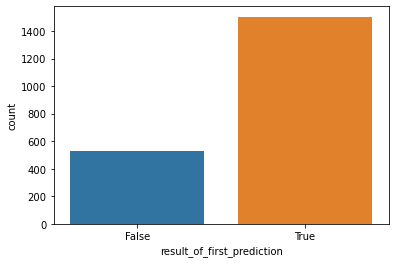

In [290]:
sns.countplot(x='result_of_first_prediction', data=df)

The above charts shows that most of the results of the first prediction is correct. Exactly, 73% of the tests were correct in the first prediction. We might try to optimize the algorthim to increase the percentage.

<a id='#q3'></a>
### Research Question 3
#### Is there a correlation between favorate and retweet?

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

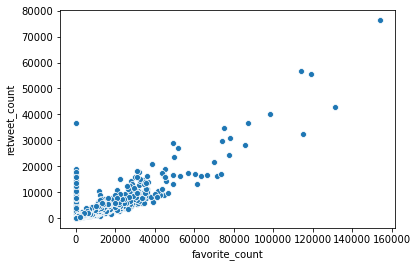

In [291]:
sns.scatterplot(
    data=df, x="favorite_count", y="retweet_count"
)

The above chart shows there is a strong correlation between favorite and retweet, since increasing in number of retweets leads to increasing in number of likes.

<a id='#q4'></a>
### Research Question 4
#### What is the most common rating?

<AxesSubplot:xlabel='rating_numerator', ylabel='count'>

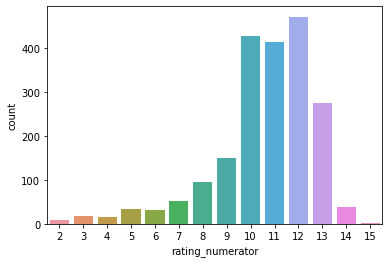

In [292]:
sns.countplot(x='rating_numerator', data=df)

The above chart shows that the rating is limited between 15 and 2 and the majority of the ratings placed between 10 and 13. In addition, the ratings which is above 15 were ignored since that usually was given to images which have more than one dog.

<a id='#q5'></a>
### Research Question 5
#### What is the most favorate dog stage?

Text(0, 0.5, 'Dog stages')

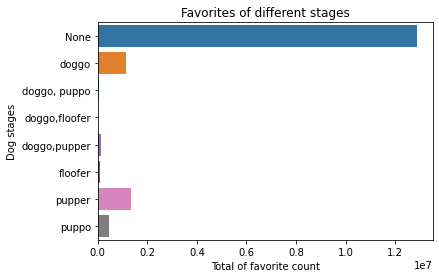

In [293]:
stage_count = df.groupby('stage').favorite_count.sum().reset_index()

sns.barplot(x=stage_count.favorite_count.values, y=stage_count.stage, data=stage_count)
plt.title('Favorites of different stages')
plt.xlabel('Total of favorite count')
plt.ylabel('Dog stages')

The above chart shows that most of the favorite counts for undefined stage "None". So, we cannot deteremine if the dog stage might affect the number of favorite.  

<a id='conc'></a>
### Conclusion

In conclusion, after investigation and understanding the data I was able to know and make sure about several details which I was know nothing about dogs.

@WeRateDogs scores does not have a standard for ratings, and it does not directly affect the user's preferences. The scale of rating should be clear and direct, since they've given ratings for some dogs 15 out of 10 which is limited me as a Data Analyst to find to specify the best dog. 

However, based on the analysis I found a strong correlation between retweet and favorate since increasing in number of retweets leads to increasing in number of likes. And something came up in my mind when I find this correlation because I don't need to ask people to retweet and like my tweets. I can simply ask them only to retweet then the number of likes should increase as well.

Moreover, it seems that iPhone is more way popluar than other sources since there is a significant difference between iPhone and other sources. In particular, iPhone is the highest source used to tweet more than Twitter Web Client and TweetDeck. iPhone has been used to tweet 7980 times, on the other hand Twitter Web Client and TweetDeck have less than 120 times.

In addition, I wasn't able to determine if the dog stage might affect the total number of favorite, since most of the favorite counts is categorized as undefined stage "None".

In [294]:
# hiding code for proper presentation
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')